# Differential Equation for Conductance

Here we want to numerically solve a first-order partial linear ordinary differential equation for the function $g[V(t),t]$. The equation reads

$\frac{\partial g[V(t),t]}{\partial t} = \frac{g_{\infty}[V(t)]-g[V(t),t]}{\tau}$

and physically describes the dynamics of the conductance in an ionic channel [arXiv:2309.11438]. It depends on time $t$ and on the potential $V(t)$. The function $g_{\infty}[V(t)]$ represents the steady solution (at long times), therefore an exponential relaxation towards the steady state is above implied. The time that characterizes this relaxation is $\tau$. 

In the following I will use expressions and parameters that describe the system in [arXiv:2309.11438] and reproduce the results in the paper. 

>The goal is to change the shape of the potential $V(t)$ in time to **obtain an ionic channel that can be used to connect nodes in a trainable network**.

In [1]:
%load_ext autoreload
%autoreload 2

import sys
import matplotlib.pyplot as plt
sys.path.append('../codes/')
import odeint_solver
import plotting_functions
from parameters_channels import *
import potential_shapes

### Reproducing results

In the following, we choose a voltage dependent on time with a triangular shape which oscillates in the range $[-1,1]$, as in the paper. Let us first compute the steady solution for this particular potential shape, as in Eq. (5).

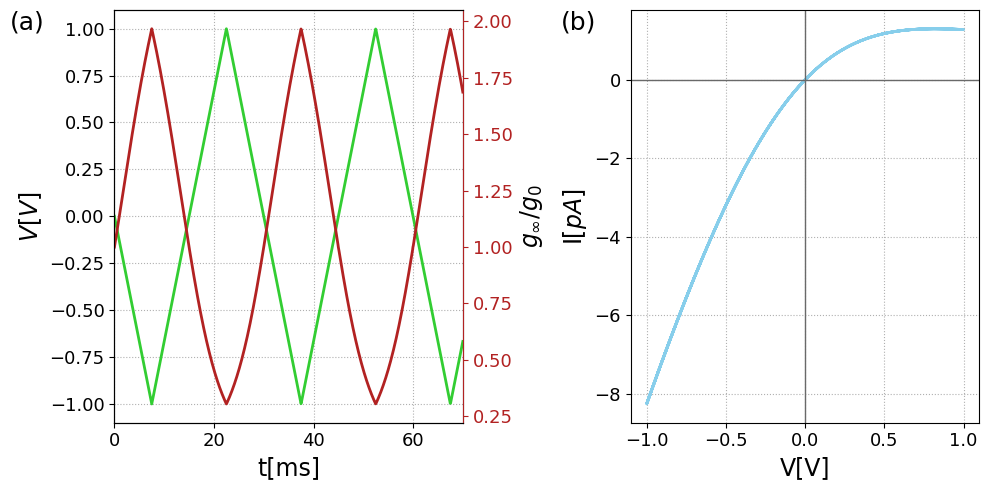

In [4]:
potential_shapes.potential(0, shape='triangular' , write=True)
odeint_solver.steady_solution(potential_shape='triangular')
fig, ax = plt.subplots(1,2, figsize=(10,5))
plotting_functions.plot_voltage_gsolution(ax[0], solution_type='static', label='(a)')
# ax[0].legend(fontsize=legend_size)
plotting_functions.plot_current_voltage(ax[1], solution_type='static', label="(b)")
fig.tight_layout()
plt.savefig("../../Physics_Driven_Learning/notes/figures_tex/cone_steady_state.pdf")

In [37]:
print(g_0)

4.201559020691334e-12


And here the solution of the differential equation with this potential and steady solution. To solve the equation I used both ODEINT package and a simple Euler Forward scheme, they give the same result.

4e-12
4.0030906607981e-12
4.006844144326119e-12
4.0111299411846785e-12
4.015942139844747e-12
4.021274834513974e-12
4.027122115988402e-12
4.033478074842233e-12
4.04033680295032e-12
4.0476924057006e-12
4.0555389836440755e-12
4.063870634675323e-12
4.072681456693701e-12
4.081965549987349e-12
4.091717015631016e-12
4.1019299532509014e-12
4.112598462473204e-12
4.123716642546265e-12
4.135278591724639e-12
4.147278408951939e-12
4.1597101932273626e-12
4.172568044362851e-12
4.1858460712511716e-12
4.199538378247345e-12
4.2136390674545236e-12
4.228142240975863e-12
4.243042000914517e-12
4.258332449373641e-12
4.274007688456387e-12
4.290061836913571e-12
4.306489049954231e-12
4.323283454569877e-12
4.340439176061489e-12
4.357950339911435e-12
4.375811112586307e-12
4.39401567253623e-12
4.412558176480399e-12
4.431432782987358e-12
4.450633712070972e-12
4.4701551809005354e-12
4.489991386117637e-12
4.5101365304318055e-12
4.5305848985280106e-12
4.551330759904464e-12
4.57236836864989e-12
4.593692046469666e-12
4.

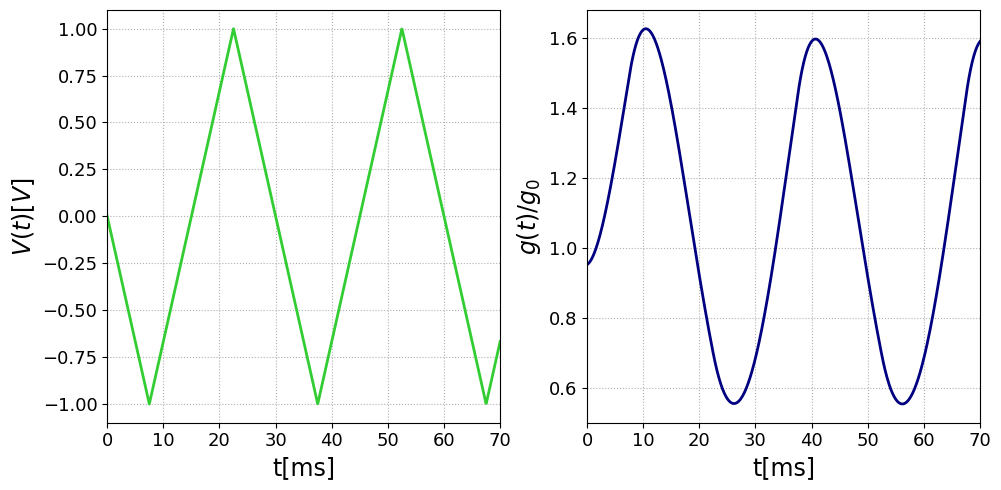

In [3]:
odeint_solver.odeint_solver_function('triangular')
potential_shapes.potential(0, 'triangular', write=True)
fig, ax = plt.subplots(1,2, figsize=(10,5))
plotting_functions.plot_voltage(ax[0], yaxis_label=True)
plotting_functions.plot_gsolution(ax[1], solver = 'odeint')
fig.tight_layout()

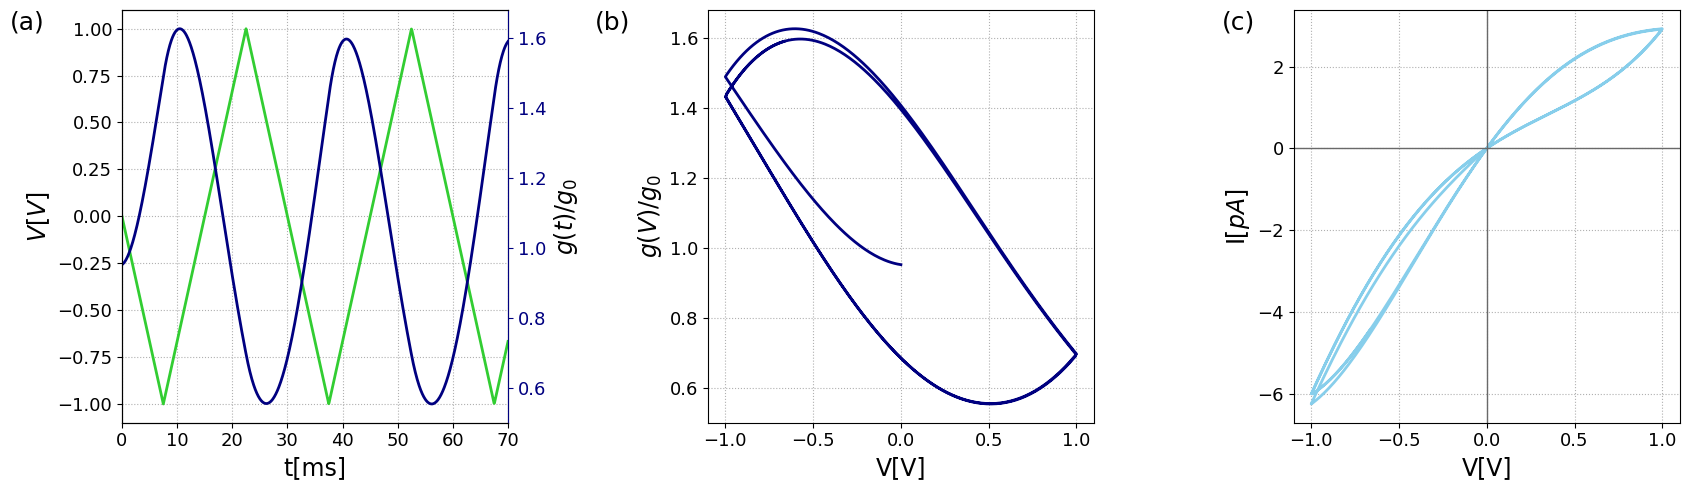

In [4]:
fig, ax = plt.subplots(1,3, figsize=(17,5))
plotting_functions.plot_voltage_gsolution(ax[0], 'dynamic', label="(a)")
plotting_functions.plot_conductance_voltage(ax[1], label="(b)")
plotting_functions.plot_current_voltage(ax[2], solution_type='dynamic', label="(c)")
fig.tight_layout()
plt.savefig("../../Physics_Driven_Learning/notes/figures_tex/cone_volt_cond.pdf")

The conductance as a function of the potential reaches a limit cyle after the first potential pulse. 

600


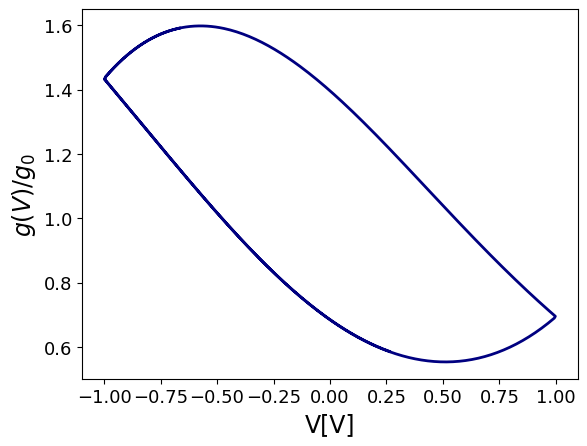

In [12]:
fig, ax = plt.subplots()
plotting_functions.plot_conductance_voltage(ax)
plt.savefig("../../Physics_Driven_Learning/notes/figures_tex/conductance_pres.pdf")

time at +  1.0 , time at - 9.0


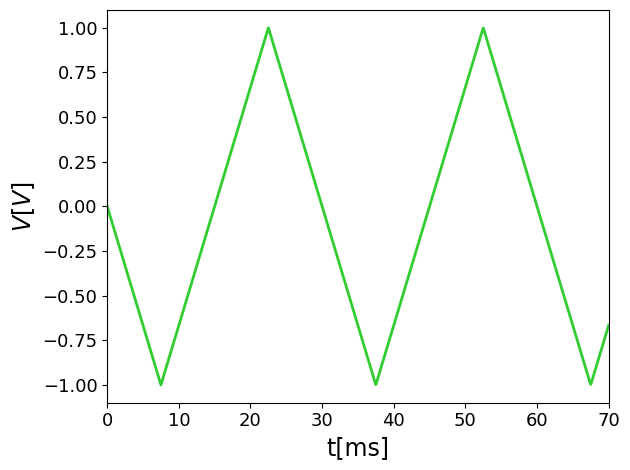

In [13]:
fig, ax = plt.subplots()
plotting_functions.plot_voltage(ax, yaxis_label=True)
fig.tight_layout()
plt.savefig("../../Physics_Driven_Learning/notes/figures_tex/voltage_triangular_pres.pdf")